# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score
from sklearn import tree


# For tuning the model
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Load the Dataset
df = pd.read_csv('/content/drive/MyDrive/MIT IDSS/Classification and Hypothesis testing /Project: Classification and Hypothesis Testing/ExtraaLearn.csv')

## Data Overview

- Observations
- Sanity checks

In [ ]:
df.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [ ]:
df.tail()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.075,Phone Activity,No,No,No,No,No,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f


There is a total of 4612 entries and 15 columns are no null values
Identifier : ID

Next,check if ID is primary key and have unique values

In [ ]:
# Checking for duplicate values in ID feature
df['ID'].duplicated().sum()

0

In [ ]:
df['ID'].nunique()

4612

there are no duplicates in column ID and each value is unique

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [ ]:
df.nunique()

,0
ID,4612
age,46
current_occupation,3
first_interaction,2
profile_completed,3
website_visits,27
time_spent_on_website,1623
page_views_per_visit,2414
last_activity,3
print_media_type1,2


ID is an identifier which is unique for each employee and we can drop this column as it would not add any value to our analysis.

In [ ]:
# Dropping ID column
df=df.drop(['ID'],axis=1)

In [ ]:
df.head()

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


**define lists for numerical and categorical columns to explore them separately.**

In [ ]:
# Creating numerical variables
num_cols=['age','website_visits','time_spent_on_website','page_views_per_visit']

# Creating categorical variables
cat_cols= ['current_occupation','first_interaction','profile_completed','last_activity','print_media_type1','print_media_type2','digital_media','educational_channels','referral']

### **1.Univariate analysis - Numerical data**

age
Skew : -0.72
Mode: 57


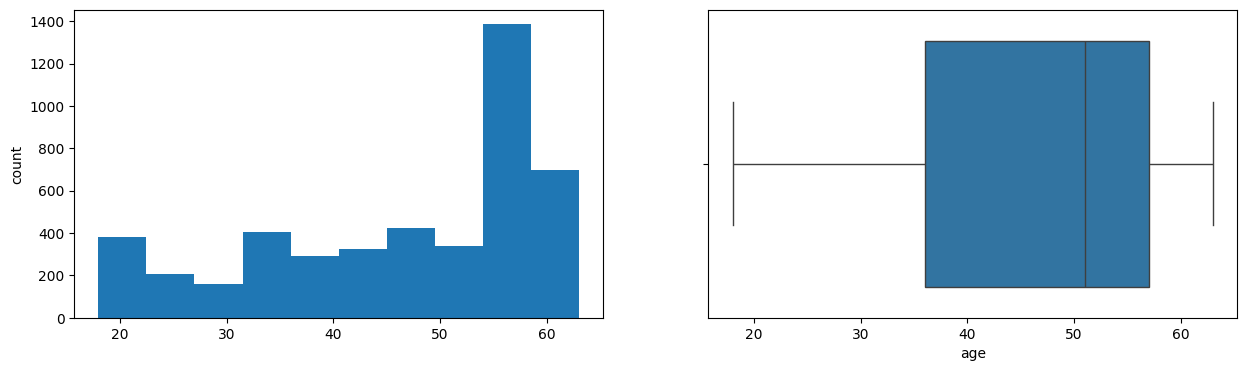

website_visits
Skew : 2.16
Mode: 2


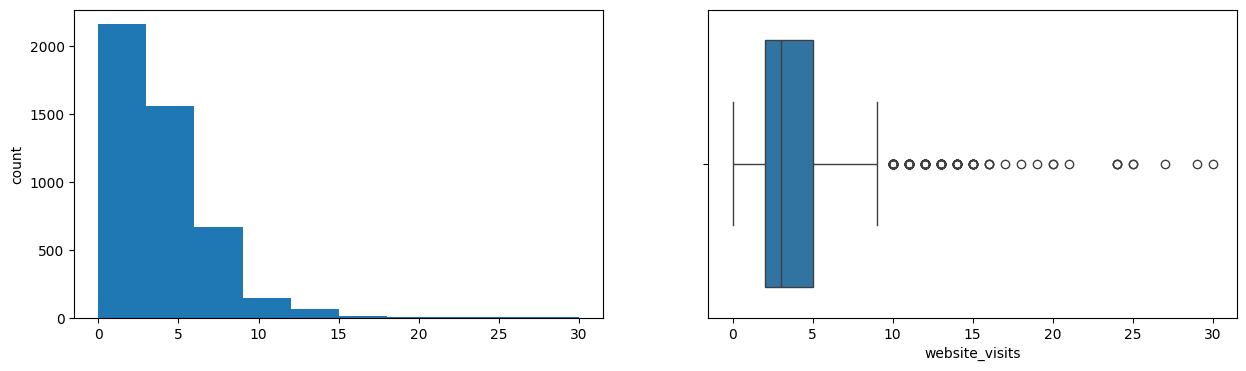

time_spent_on_website
Skew : 0.95
Mode: 0


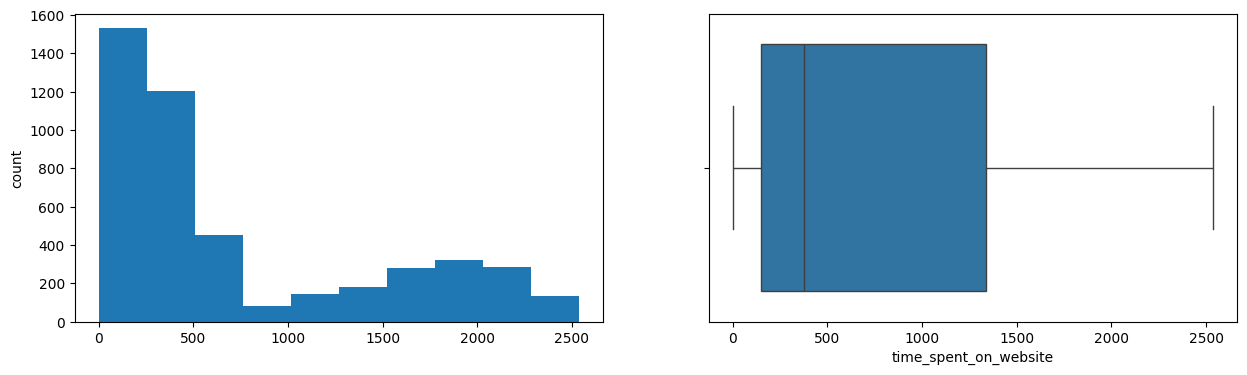

page_views_per_visit
Skew : 1.27
Mode: 0.0


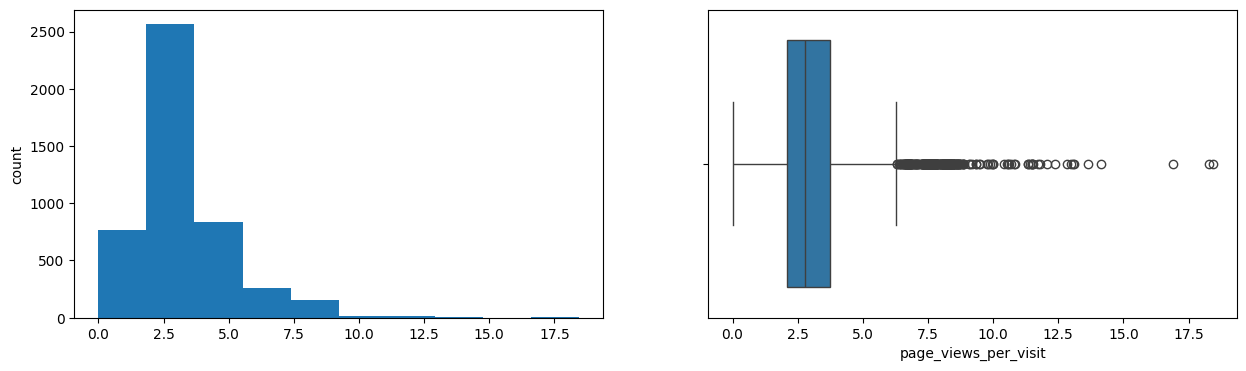

In [ ]:

#visualize the distribution for numerical variables

for col in num_cols:
    print(col)
    print('Skew :',round(df[col].skew(),2))
    print('Mode:',df[col].mode()[0])
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    df[col].hist(bins=10,grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.show()

### **Observation**


*   The distribution of age feature is left skewed with half the the lead population between 35 and 55 years old approximately
*   Distribution of Average website visits is right skewed with most observations ranging from 0 to 5. There are some **extreme values from the range of 10-30** there maybe some underlying reasons for such extremities which needs **to be investigated**
*   Distribution of average time spent on website is bimodal with one group spending around 500 seconds (8 mins) on the website and another group spending about 2000 seconds (33 mins) on the website
*   Distribution of Average page view is right skewed most of the observations view around 2-4 pages but there are **many extreme values from 7 page views to 18 page views per visit**. There maybe some underlying reasons for such extremities which needs **to be investigated**


In [ ]:
df[df['website_visits']>10].shape

(120, 14)

There are 120 such observations that can be considered as outliers. This is a significant number further investigation to be done on the dataset to see if there is recording issues or if there are bots (are these geninue leads?)

In [ ]:
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)
df[df['website_visits']>10]

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
6,56,Professional,Mobile App,Medium,13,625,2.015,Website Activity,No,No,Yes,No,No,1
31,55,Unemployed,Website,Medium,13,1055,1.373,Email Activity,No,No,Yes,Yes,No,1
32,58,Professional,Mobile App,High,12,1151,18.434,Phone Activity,No,No,No,Yes,No,0
66,59,Unemployed,Mobile App,Medium,25,311,2.184,Phone Activity,No,No,Yes,No,No,0
201,57,Professional,Mobile App,High,14,66,2.043,Email Activity,No,No,No,Yes,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4566,59,Unemployed,Mobile App,High,13,30,3.200,Website Activity,No,No,No,Yes,No,0
4571,54,Professional,Website,High,12,1513,5.703,Email Activity,No,No,No,No,No,1
4583,49,Professional,Website,Medium,24,1039,2.064,Email Activity,Yes,No,No,No,No,1
4589,21,Student,Website,High,16,251,2.108,Phone Activity,No,No,No,No,No,0


In [ ]:
df[df['website_visits']>10].describe().T

,count,mean,std,min,25%,50%,75%,max
age,120.0,47.425000,12.938551,19.000,40.75000,54.000,58.00000,62.000
website_visits,120.0,13.850000,3.851552,11.000,12.00000,13.000,14.00000,30.000
time_spent_on_website,120.0,803.183333,727.933093,1.000,233.50000,410.000,1418.25000,2388.000
page_views_per_visit,120.0,3.158842,2.221010,0.038,2.15525,2.458,3.78825,18.434
status,120.0,0.325000,0.470339,0.000,0.00000,0.000,1.00000,1.000


**observations**
*    Profile completion rates are mostly mid to high accompanied by phone activity which indicates genuine interest. Botting is very unlikely here
*    Time spent on website are quite variable, it is not likley to be systemic problem, or bot activity, which would have more clear patterns.

In [ ]:
df[df['page_views_per_visit']>7].shape

(211, 14)

In [ ]:
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)
df[df['page_views_per_visit']>7]

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0
32,58,Professional,Mobile App,High,12,1151,18.434,Phone Activity,No,No,No,Yes,No,0
47,35,Professional,Mobile App,Medium,2,497,7.050,Email Activity,No,No,No,No,No,0
110,31,Professional,Website,High,1,187,7.364,Email Activity,No,No,No,Yes,No,1
125,59,Unemployed,Mobile App,Medium,2,246,7.662,Phone Activity,No,No,No,Yes,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4433,47,Unemployed,Mobile App,Medium,7,646,7.303,Website Activity,No,No,No,No,No,0
4466,58,Professional,Website,Medium,2,1691,9.200,Email Activity,No,Yes,No,No,No,1
4514,42,Professional,Mobile App,Medium,2,762,7.997,Phone Activity,No,No,No,No,No,0
4572,55,Unemployed,Mobile App,High,1,617,7.397,Phone Activity,No,No,No,No,No,0


In [ ]:
df[df['page_views_per_visit']>7].describe().T

,count,mean,std,min,25%,50%,75%,max
age,211.0,43.137441,14.489572,18.00,32.0000,45.000,57.0000,63.000
website_visits,211.0,3.592417,2.426979,1.00,2.0000,3.000,5.0000,16.000
time_spent_on_website,211.0,819.151659,780.110936,1.00,186.0000,419.000,1561.0000,2438.000
page_views_per_visit,211.0,8.600370,1.767565,7.05,7.6035,8.104,8.6085,18.434
status,211.0,0.232227,0.423258,0.00,0.0000,0.000,0.0000,1.000


In [ ]:
df[df['page_views_per_visit']>7].nunique()

,0
age,44
current_occupation,3
first_interaction,2
profile_completed,3
website_visits,13
time_spent_on_website,190
page_views_per_visit,208
last_activity,3
print_media_type1,2
print_media_type2,2


**observations**

*    Profile completion rates are mostly mid to high accompanied by phone activity which indicates genuine interest. Botting is very unlikely here
*    Page views per visit and Time spent on website are quite variable, it is not likley to be systemic problem, or bot activity, which would have more clear patterns.

## **2.Univariate analysis - Categorical data**

In [ ]:
print(df['status'].value_counts())

status
0    3235
1    1377
Name: count, dtype: int64


In [ ]:
 # Printing the % sub categories of each category
for i in cat_cols:
    print(df[i].value_counts(normalize=True))
    print('*'*40)

current_occupation
Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: proportion, dtype: float64
****************************************
first_interaction
Website       0.551171
Mobile App    0.448829
Name: proportion, dtype: float64
****************************************
profile_completed
High      0.490893
Medium    0.485906
Low       0.023200
Name: proportion, dtype: float64
****************************************
last_activity
Email Activity      0.493929
Phone Activity      0.267563
Website Activity    0.238508
Name: proportion, dtype: float64
****************************************
print_media_type1
No     0.892238
Yes    0.107762
Name: proportion, dtype: float64
****************************************
print_media_type2
No     0.94948
Yes    0.05052
Name: proportion, dtype: float64
****************************************
digital_media
No     0.885733
Yes    0.114267
Name: proportion, dtype: float64
****************************************
educ

In [ ]:
# Let us write a function that will help us create barplots that indicate the percentage for each category.
# This function takes the categorical column as the input and returns the barplots for the variable.

def perc_on_bar(data, z):
    '''
    plot
    data: DataFrame or Series
    z: categorical feature
    '''

    total = len(data[z])  # Length of the column
    plt.figure(figsize=(8, 5))
    ax = sns.countplot(data=data, x=z, palette='Paired', order=data[z].value_counts().index)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)  # Percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # Width of the plot
        y = p.get_y() + p.get_height()  # Height of the plot

        ax.annotate(percentage, (x, y), size=12, ha='center')  # Annotate the percentage with center alignment

    plt.show()

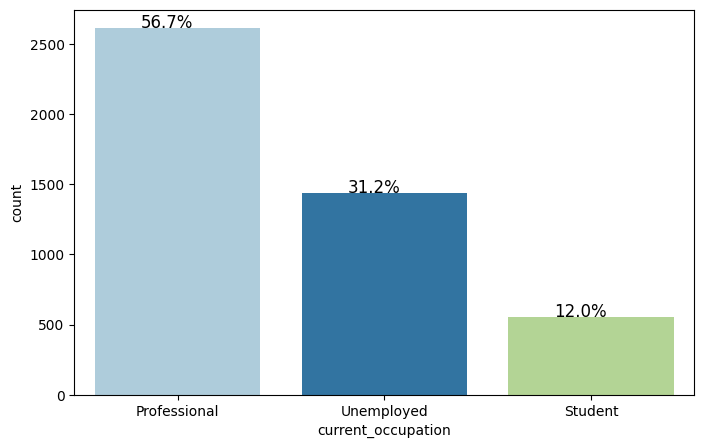

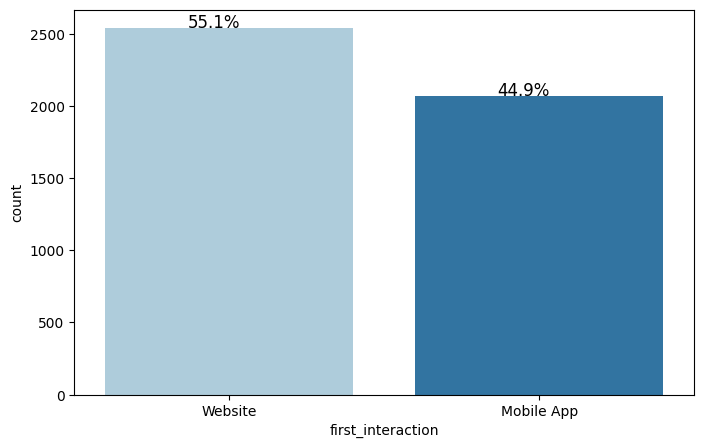

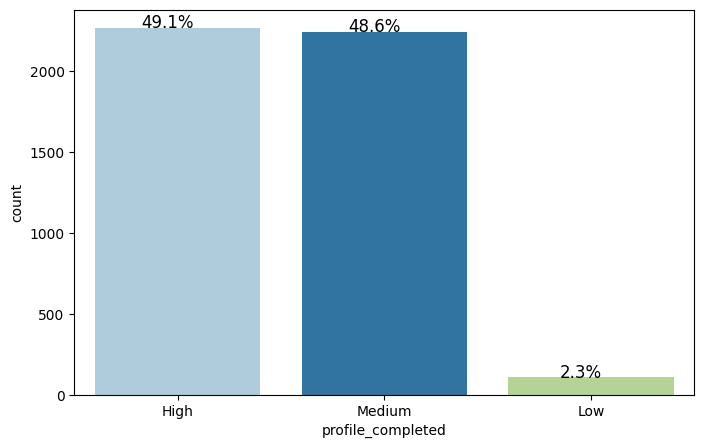

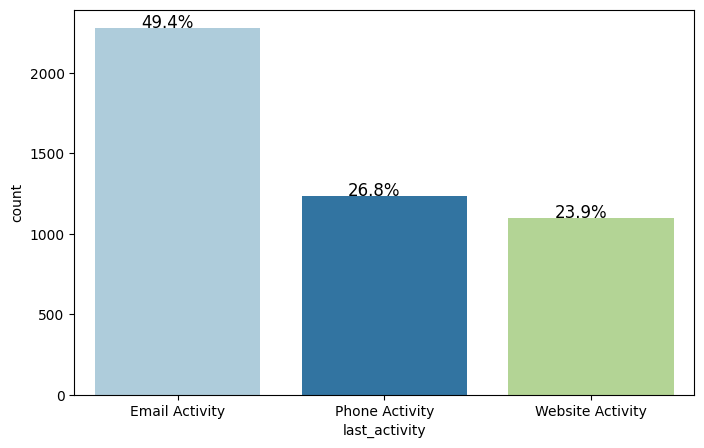

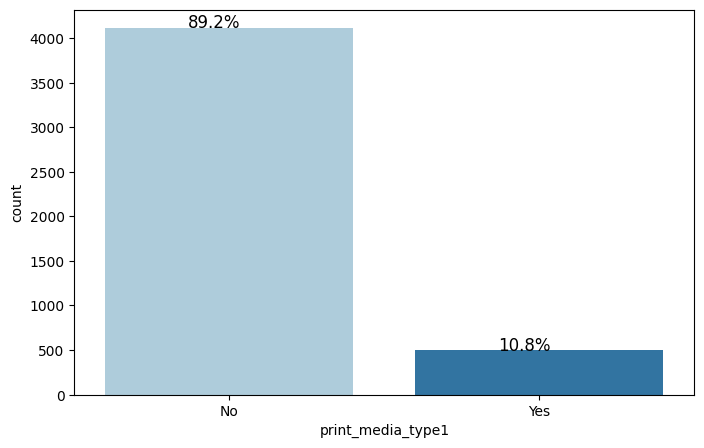

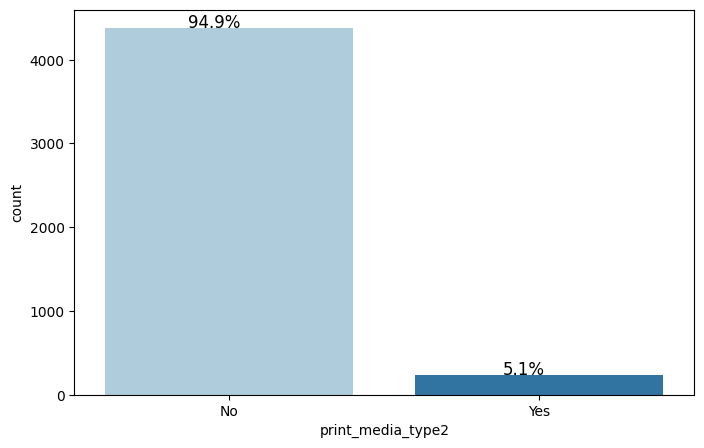

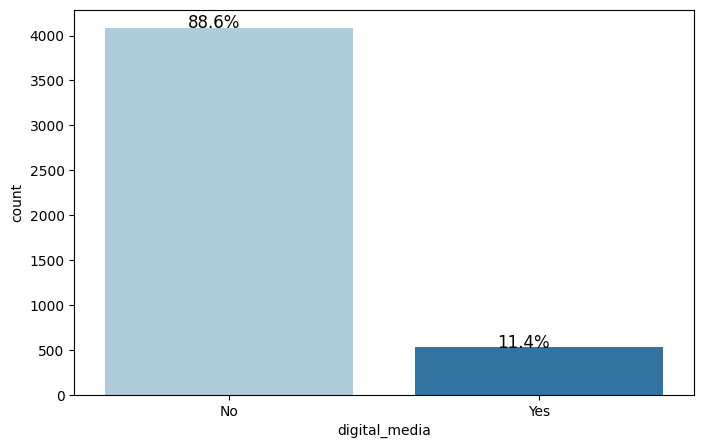

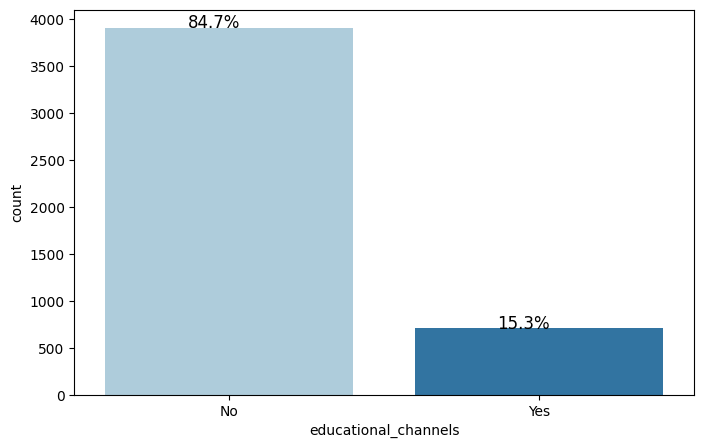

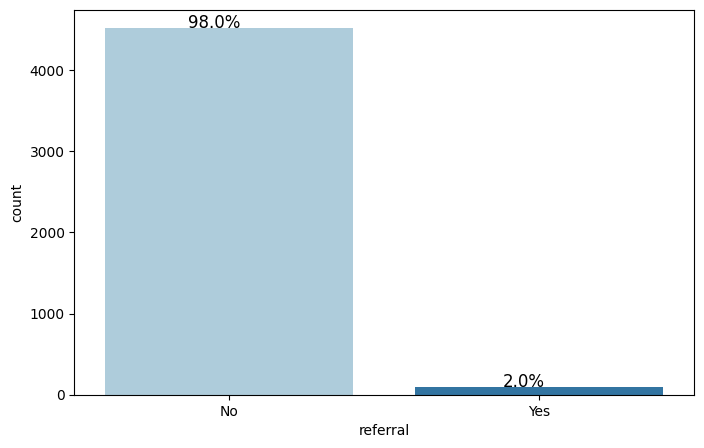

In [ ]:
for col in cat_cols:
  perc_on_bar(df, col)

### **Observation**

*   Majority of the leads are working professionals 56.7% and the second largest group are currently unemployed 31.2% these 2 groups make up 87.9% of the population. It could be that only working adults could afford to fund their own further studies
*   Both Mobile app and Websites are quite close as the choice of first interaction with slightly more coming from website at 55.1%
*   Most of the leads either fully complete 49.1% or medium complete 48.6% their profiles showing genuine interest in connecting with Extraalearn
*   Last activity with Extraalearn is mainly email at nearly half of the population 49.3% phone activity and website activity both make up 26.3% and 23.8% respectively. This could be due to customer service staff from Extraalearn following up on potential leads through emails. This also shows ExtraaLearn engagement of potential leads through different channels.
*  A significant portion of the lead population has not encountered Extraalearn's ads in print media, with 89.2% not seeing them in newspapers and 94.9% not seeing them in magazines. Only 10.7% of the population reported reading about Extraalearn in newspapers, and just 5.0% have seen ads in magazines.
*  Digital media seems to have a slightly better reach than newspapers at 11.4%
*  Education channels like online forums, discussion threads, educational websites, etc. seem to have the best reach at 15.3%
*  Leads generated by referral are extremely low 2%, suggesting that word-of-mouth is not a significant lead source


**Summary**:
*    Majority of the leads are working professionals and unemployed
*    Print media, referrals are not effective to gather leads. From a cost perspective , referrals could be cheap marketing whereas print media is relatively more expensive.
*    Many of the leads are generated by marekting efforts online via Digital media and education channels

## Bivariate Analysis

We want to explore relationships between other variables and the dependent variable 'status'

**1. Heatmap**

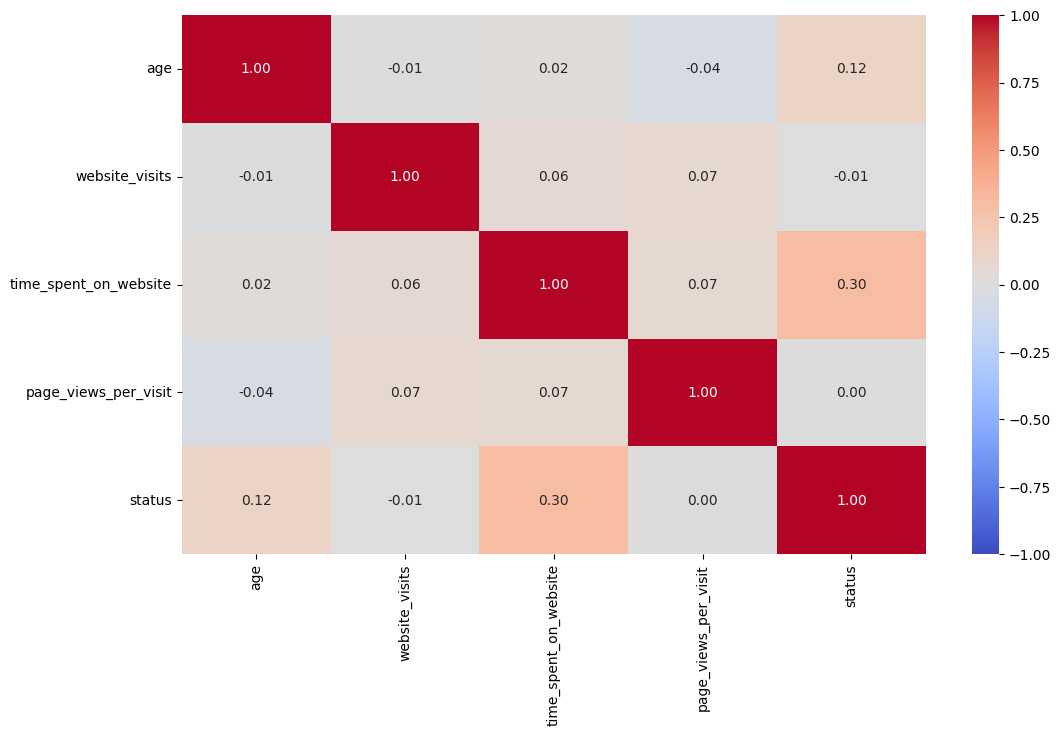

In [ ]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt='.2f', cmap = 'coolwarm')
plt.show()

**observations:**

*    There is a moderate positive correlation between Time Spent on Website and Status indiactes that leads spending more time on the website have higher conversion rates.
*    a slight positive correlation between age and status, suggesting older leads might have higher likelihood of converting.


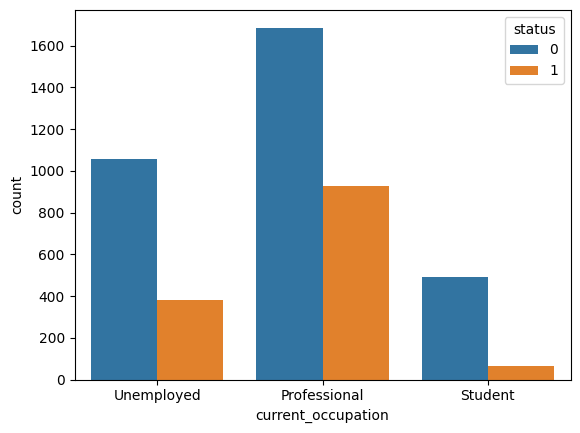

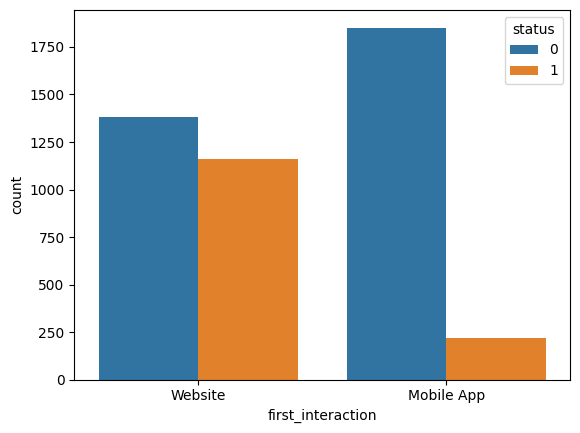

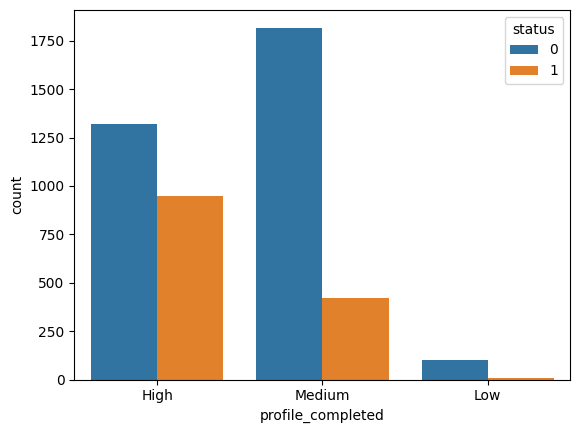

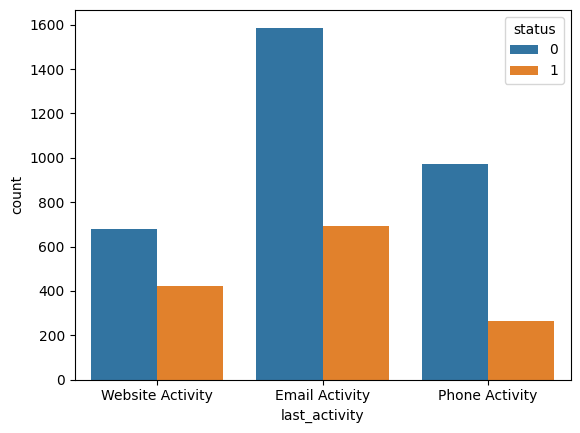

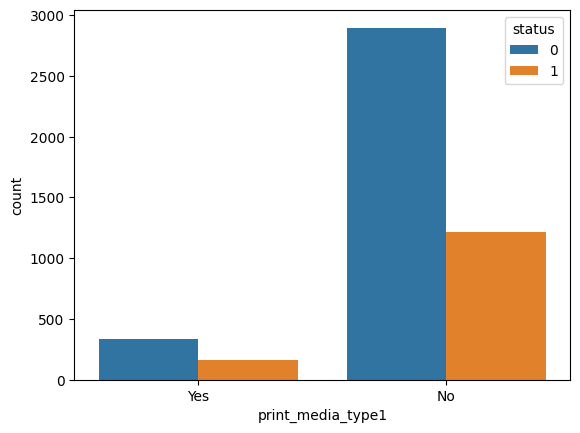

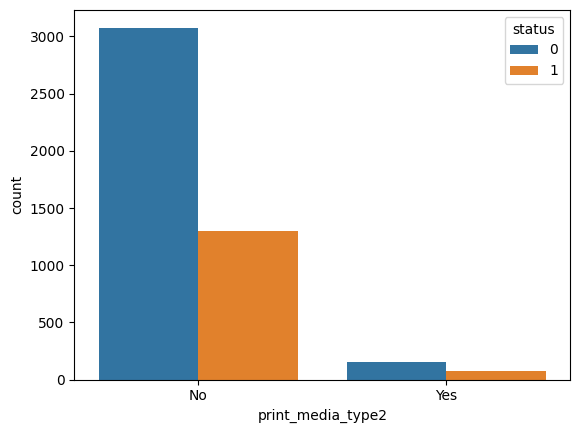

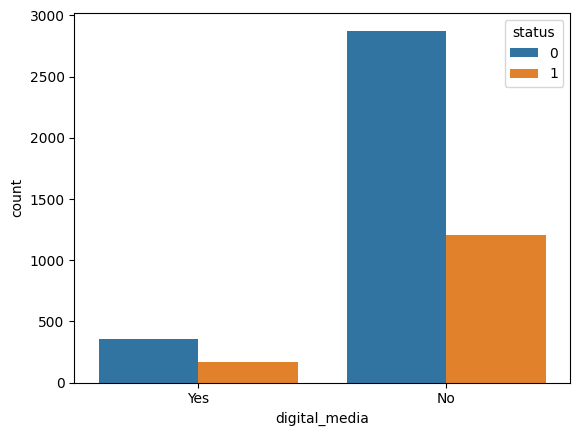

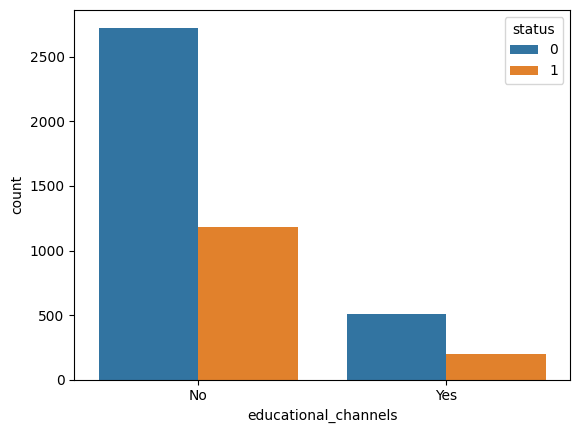

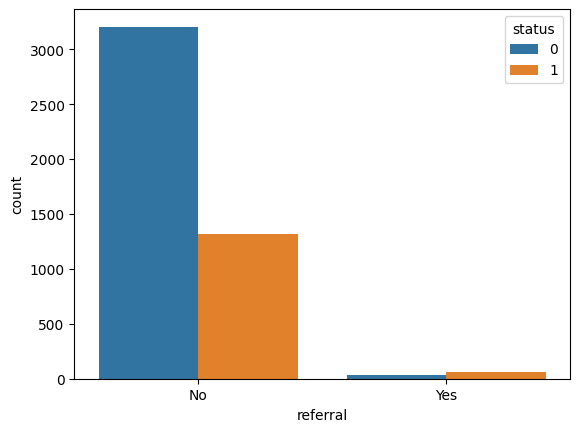

In [ ]:
# analyzing categorical independent variables with the dependent variable

for col in cat_cols:
    sns.countplot(x = col, hue = 'status', data = df)
    plt.show()

### Looking closer at the type of media used by ExtraaLearn to gather leads
*   print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper
*   print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine
*   digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms
*   educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
*   referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.

In [ ]:
df.groupby(['print_media_type1', 'status'])[num_cols].mean()

age  website_visits  time_spent_on_website  \
print_media_type1 status                                                     
No                0       45.144978        3.603383             578.646531   
                  1       48.610837        3.504926            1083.103448   
Yes               0       45.221893        3.369822             566.914201   
                  1       49.069182        3.792453             955.748428   

                          page_views_per_visit  
print_media_type1 status                        
No                0                   3.035432  
                  1                   3.047480  
Yes               0                   2.942595  
                  1                   2.870547

*    The average age of leads who know Extraalearn from newspapers are on average 4 years older than the ones who know of Extraalearn from other forms of media.
*    As earlier dicovered leads who know of Extraalearn from newspapers account for a very small percentage of the population 10%
*  An observation of leads with status=1 tends to be older and spend longer time on website

In [ ]:
df.groupby(['print_media_type2', 'status'])[num_cols].mean()

age  website_visits  time_spent_on_website  \
print_media_type2 status                                                     
No                0       45.121222        3.570036             573.251544   
                  1       48.659754        3.552995            1066.908602   
Yes               0       45.772152        3.753165             658.613924   
                  1       48.733333        3.280000            1094.253333   

                          page_views_per_visit  
print_media_type2 status                        
No                0                   3.021670  
                  1                   3.018648  
Yes               0                   3.104842  
                  1                   3.172907

*    The average age of leads who know Extraalearn from magazines are about 3 years older than the ones who know of Extraalearn from other forms of media.

In [ ]:
df.groupby(['digital_media', 'status'])[num_cols].mean()

age  website_visits  time_spent_on_website  \
digital_media status                                                     
No            0       45.029555        3.585883             570.854312   
              1       48.670802        3.523573            1053.349876   
Yes           0       46.142061        3.523677             630.025070   
              1       48.613095        3.642857            1176.690476   

                      page_views_per_visit  
digital_media status                        
No            0                   3.025999  
              1                   3.019991  
Yes           0                   3.023596  
              1                   3.077851

*    The average age of leads who know Extraalearn from magazines are about 1-2 years older than the ones who know of Extraalearn from other forms of media.

In [ ]:
df.groupby(['educational_channels','status'])[num_cols].mean()

age  website_visits  time_spent_on_website  \
educational_channels status                                                     
No                   0       45.216722        3.580491             589.015035   
                     1       48.786441        3.512712            1072.007627   
Yes                  0       44.811024        3.570866             515.181102   
                     1       47.928934        3.690355            1046.776650   

                             page_views_per_visit  
educational_channels status                        
No                   0                   3.012875  
                     1                   2.958890  
Yes                  0                   3.094752  
                     1                   3.435320

In [ ]:
df.groupby(['referral','status'])[num_cols].mean()

age  website_visits  time_spent_on_website  \
referral status                                                     
No       0       45.177535        3.578159             576.422777   
         1       48.697108        3.526636            1062.564688   
Yes      0       42.533333        3.666667             684.033333   
         1       47.968254        3.777778            1190.063492   

                 page_views_per_visit  
referral status                        
No       0                   3.021768  
         1                   3.039547  
Yes      0                   3.449167  
         1                   2.766397

**Observations**:
* There is no noticable segmentation of lead poplulation with types of media, it seems like the type of media do not have much influence on lead conversion
* However there is a general trend that leads who convert (status =1 ) is older in average age and also spends longer time on website



### **Summary:**
*    There are more converted leads from Professionals and the unemployed
*    Leads that first interacted with ExtraaLearn throught website also sees higher rate of conversion
*    Leads that has higher levels of profile completion has higer conversion rates. The level of profile completeness could be an indication to the level of interest from the lead
*    Observation for last_activity. Highest conversion rates for email followed by website, and lowest for leads enaged by phone. This could be influenced by matketing activities from Extraalearn and not user bahaviour. No insights to draw from here
*    We see a general trend of leads who convert (status=1 ) are **higher in average age** and also **spends longer time on websites**

## **Data preparation for Model Building**


**Creating dummy variables for categorical Variables**

In [ ]:
# Creating list of dummy columns
to_get_dummies_for = ['current_occupation', 'first_interaction', 'profile_completed', 'last_activity']

In [ ]:
# Creating dummy variables
df = pd.get_dummies(data = df, columns = to_get_dummies_for, drop_first = True)

In [ ]:
# Mapping print_media_type1, print_media_type2, digital_media, educational_channels, referral
dict_print_media_type1 = {'Yes': 1, 'No':0}
dict_print_media_type2 = {'Yes': 1, 'No':0}
dict_digital_media = {'Yes': 1, 'No':0}
dict_educational_channels = {'Yes': 1, 'No':0}
dict_referral = {'Yes': 1, 'No':0}

df['print_media_type1'] = df.print_media_type1.map(dict_print_media_type1)
df['print_media_type2'] = df.print_media_type2.map(dict_print_media_type2)
df['digital_media'] = df.digital_media.map(dict_digital_media)
df['educational_channels'] = df.educational_channels.map(dict_educational_channels)
df['referral'] = df.referral.map(dict_referral)

**Separating the independent variables (X) and the dependent variable (Y)**

In [ ]:
# Separating target variable and other variables
Y= df.status
X= df.drop(columns = ['status'])

**Splitting the data into 70% train and 30% test set**

In [ ]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, stratify = Y)

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [ ]:
df.head()

,age,website_visits,time_spent_on_website,page_views_per_visit,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity
0,57,7,1639,1.861,1,0,1,0,0,1,False,True,True,False,False,False,True
1,56,2,83,0.320,0,0,0,1,0,0,False,False,False,False,True,False,True
2,52,3,330,0.074,0,0,1,0,0,0,False,False,True,False,True,False,True
3,53,4,464,2.057,0,0,0,0,0,1,False,True,True,False,False,False,True
4,23,4,600,16.914,0,0,0,0,0,0,True,False,True,False,False,False,False


## Building a Decision Tree model

In [ ]:
# Building a Decision tree model
dt = DecisionTreeClassifier(random_state=1)

# Fitting the model
dt.fit(X_train, y_train)


DecisionTreeClassifier(random_state=1)

**Let's check the model performance of decision tree** <br>
create a function to calculate and print the classification report and confusion matrix

In [ ]:
# Creating metric function
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))

    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Paid', 'Paid customer'], yticklabels=['Not Paid', 'Paid customer'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

**Checking performance on the training dataset**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



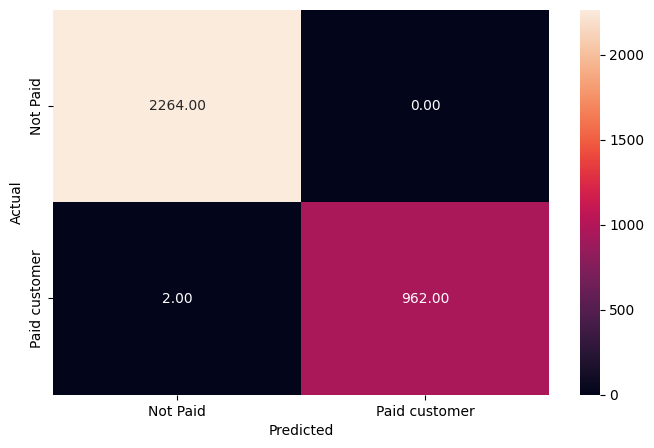

In [ ]:
# Checking performance on the training dataset
y_train_pred_dt = dt.predict(X_train)

metrics_score(y_train, y_train_pred_dt)

**Observation:** <br>
*     Model has performed very well on the training set.

**Checking performance on the test dataset**

              precision    recall  f1-score   support

           0       0.85      0.86      0.85       971
           1       0.66      0.64      0.65       413

    accuracy                           0.79      1384
   macro avg       0.75      0.75      0.75      1384
weighted avg       0.79      0.79      0.79      1384



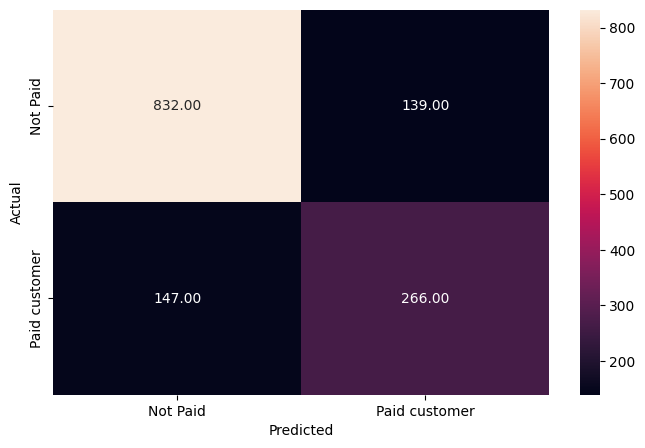

In [ ]:
# Checking performance on the test dataset
y_test_pred_dt = dt.predict(X_test)

metrics_score(y_test, y_test_pred_dt)

**Observations:**

*    The Decision Tree is overfitting the training data
*    The Decision tree works well on the training data but not on the test data recall is only 0.64 in test data in comparison to 1 for the training dataset
*   The precision on the test data suggests that there's a 34% (1 - 0.66) chance that the model will predict that a person is going convert to a paying customer even though he/she would not, and the company may waste their time and marketing budget on these leads

**Perform hyperparameter tuning for the decision tree model using GridSearch CV** <br>
Tune the decision tree to reduce overfitting

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(1,100,10),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}
# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, cv=5,scoring='recall',n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=11, max_leaf_nodes=50, min_samples_split=10,
                       random_state=1)

**Check the performance of the model on the train and test data using the tuned model**

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      2264
           1       0.81      0.83      0.82       964

    accuracy                           0.89      3228
   macro avg       0.87      0.88      0.87      3228
weighted avg       0.89      0.89      0.89      3228



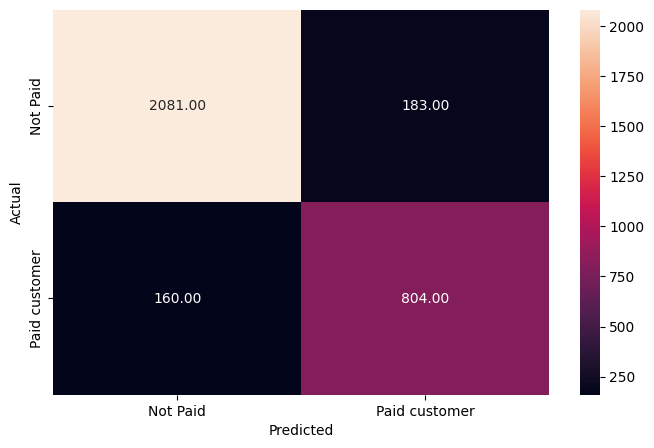

In [ ]:
# Checking performance on the training dataset
dt_tuned = estimator.predict(X_train)
metrics_score(y_train,dt_tuned)

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       971
           1       0.75      0.77      0.76       413

    accuracy                           0.85      1384
   macro avg       0.82      0.83      0.83      1384
weighted avg       0.86      0.85      0.85      1384



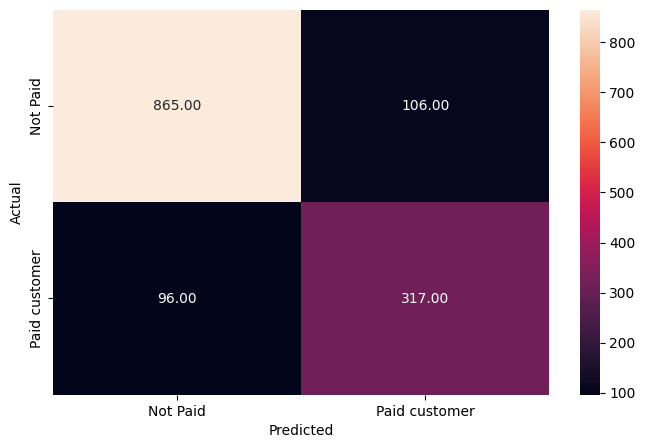

In [ ]:
# Checking performance on the test dataset
y_pred_tuned = estimator.predict(X_test)
metrics_score(y_test,y_pred_tuned)

**Observation : Tuned Decision Tree**
*    Decision tree model with default parameters is overfitting the training data the Tuned model has improved the performance of the decision tree
*    The recall value originally was 0.64 has now seen an improvment to 0.77 in the tuned model
*    precision on tuned model has also seen an improvment. From previously 0.66 yo now , 0.75
*    There is also an improvment on the overfitting problem in the tuned model



**Let's plot the feature importance and check the most important features on the tuned tree.**

Text(0.5, 1.0, 'Feature Importance Tuned Decision Tree')

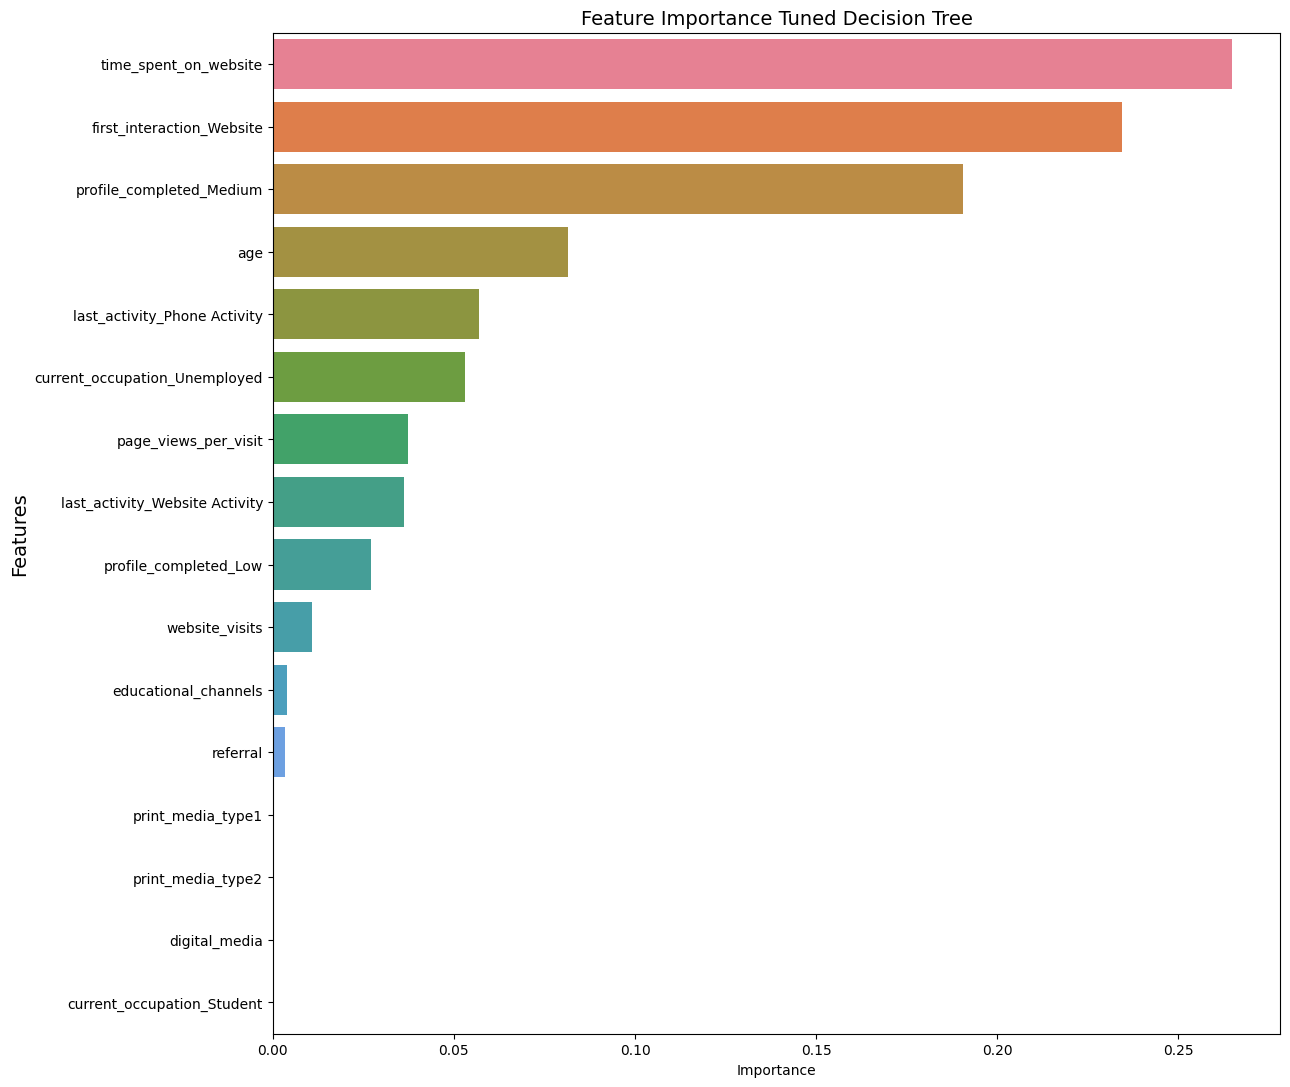

In [ ]:
# Plot the feature importance

importances = estimator.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index, hue=importance_df.index)
plt.ylabel('Features', fontsize = 14)
plt.title('Feature Importance Tuned Decision Tree', fontsize = 14)

**Observations:**

*    According to the Tuned Decision Tree, time_spent_on_website is the most important feature, followed by first_interaction_website, profile_completed, age, last activity as phone
*    This might signify that people who spent the most time on ExtraaLearn website and came to know about ExtraaLearn via the web and the completed most of their profile completness would indicate a cetain level of interest and is likely to become a paid customer
*    There is also indication that age of the lead is an important feature.
*    As we can see having an online presence is crucial for Extraalearn to suceed in drawing customers

**Plotting the Tuned Tree**

As we know the decision tree keeps growing until the nodes are homogeneous, i.e., it has only one class, and the dataset here has a lot of features, it would be hard to visualize the whole tree with so many features.

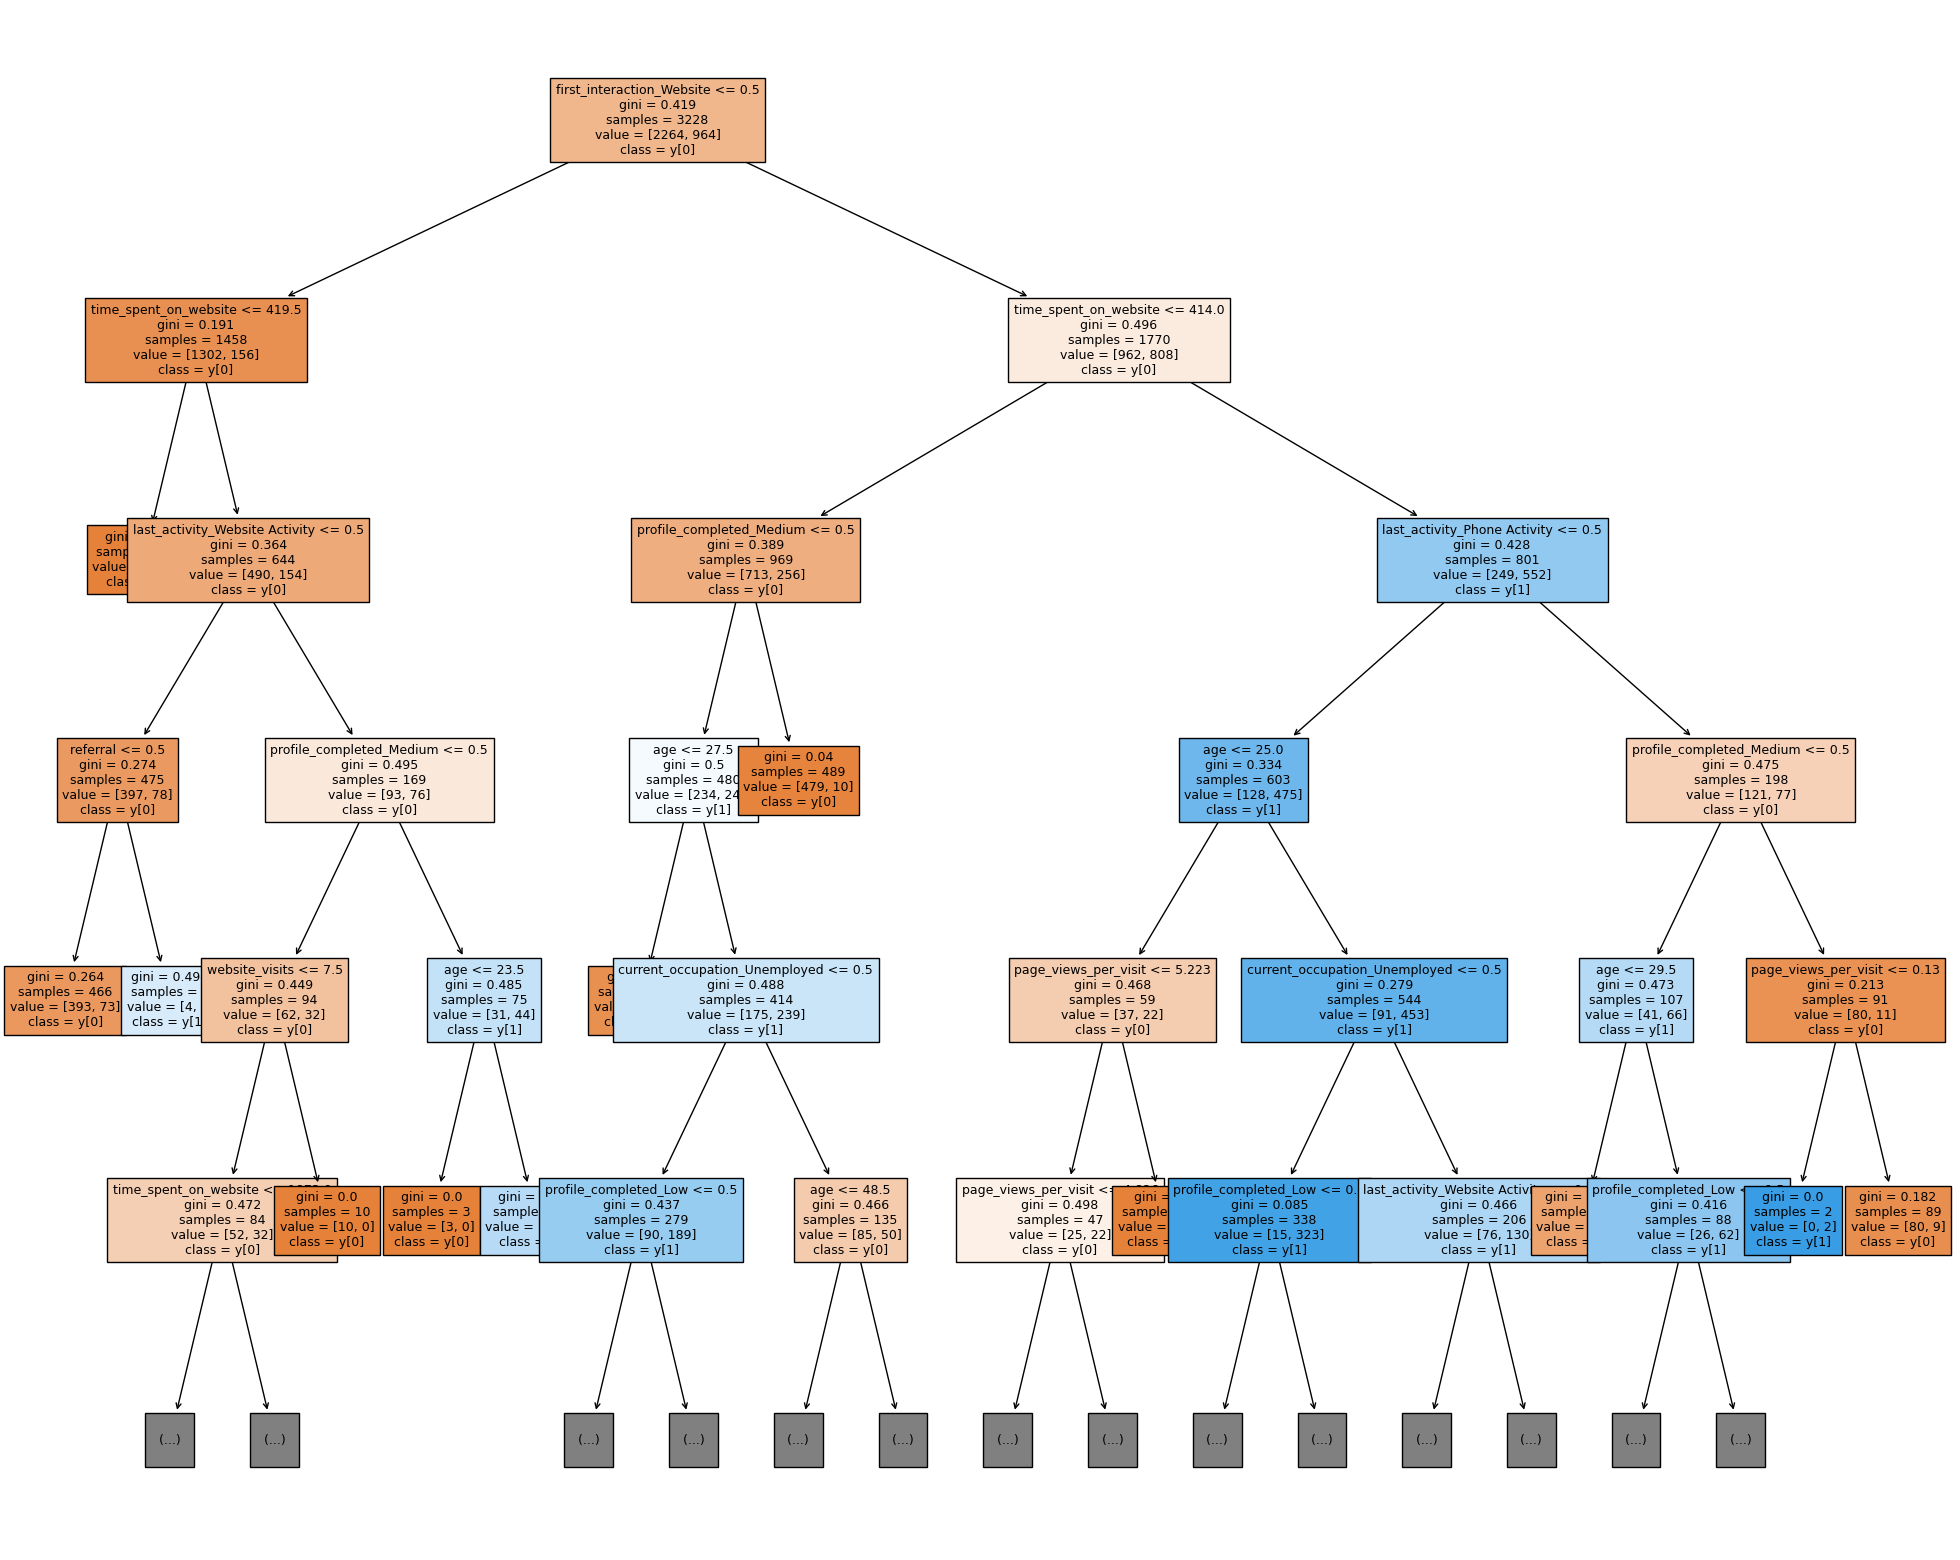

In [ ]:
features = list(X.columns)
plt.figure(figsize = (25, 20))

tree.plot_tree(estimator, max_depth = 5, feature_names = features, filled = True, fontsize = 9, node_ids = False, class_names = True)

plt.show()

## Do we need to prune the tree?

The tree is Pre-pruned max_depth = 5 as the dataset is rather large

## Building a Random Forest model

### Random Forest
*    Random Forest is a bagging algorithm where the base models are Decision Trees. Samples are taken from the training data and on each sample, a decision tree makes a prediction.
*    The results from all the decision trees are combined and the final prediction is made using voting (for classification problems) or averaging (for regression problems).**

In [ ]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(random_state = 1)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

**Checking performance on the training data**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



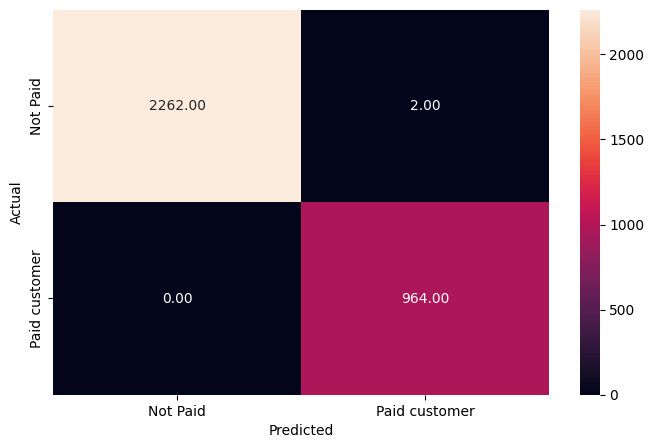

In [ ]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

**Observation:**

For all the metrics in the training dataset, the Random Forest gives a 100% score.

**Checking performance on the testing data**

              precision    recall  f1-score   support

           0       0.89      0.92      0.91       971
           1       0.79      0.74      0.77       413

    accuracy                           0.86      1384
   macro avg       0.84      0.83      0.84      1384
weighted avg       0.86      0.86      0.86      1384



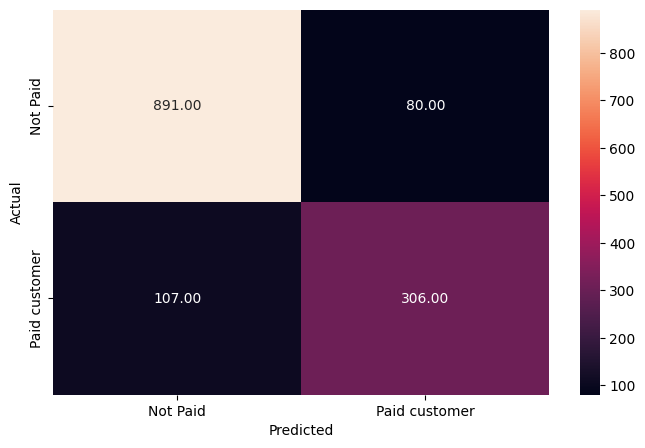

In [ ]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

Observations:

*    The Random Forest classifier seems to be overfitting the training data. The recall on the training data is 1, while the recall on the test data is only ~ 0.74 for class 1.
*    The precision on the test data suggests that there's a 20% (1 - 0.79) chance that the model will predict that a person is going convert to a paying customer even though he/she would not this is a slight improvement from the decision tree model 34% chance. But there is still room for improvement
*   The tuned decision tree had delivered better accuracy than Random forest model

**Performing Hyperparamter tuning on the Random Forest**

In [ ]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(random_state = 1)

# Grid of parameters to choose from
params_rf = {
        "n_estimators": [100, 250, 500],
        "min_samples_leaf": np.arange(1, 4, 1),
        "max_features": [0.7, 0.9, 'auto'],
}


# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [ ]:
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(max_features=0.7, min_samples_leaf=3, random_state=1)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      2264
           1       0.94      0.89      0.91       964

    accuracy                           0.95      3228
   macro avg       0.95      0.93      0.94      3228
weighted avg       0.95      0.95      0.95      3228



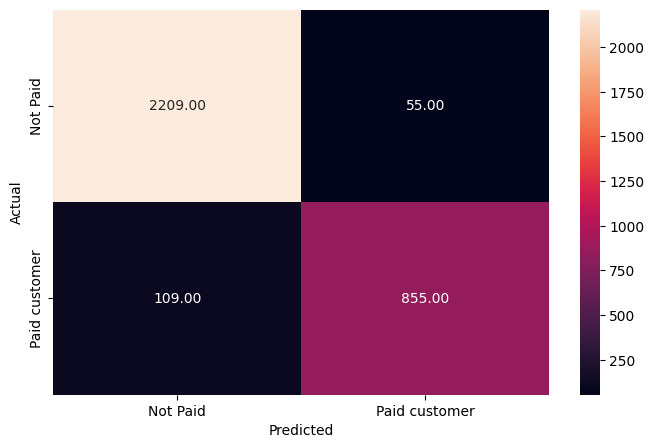

In [ ]:
# Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train_rf_tuned)

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       971
           1       0.79      0.74      0.76       413

    accuracy                           0.86      1384
   macro avg       0.84      0.83      0.83      1384
weighted avg       0.86      0.86      0.86      1384



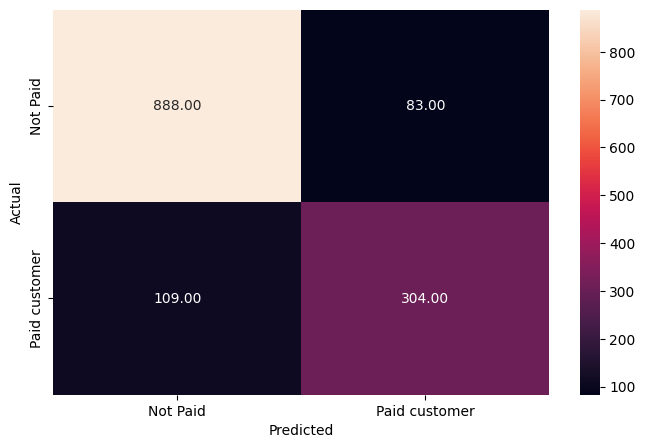

In [ ]:
# Checking performance on the test data
y_pred_test_rf_tuned = rf_estimator_tuned.predict(X_test)

metrics_score(y_test, y_pred_test_rf_tuned)

Observations:

*    The tuned model is also slightly overfitting the training dataset
*    The results from the tuned Random Forest model performs almost the same as the tuned decision tree model
* The difference being that the tuned Random Forest model performs better than the tuned decision tree model in terms of precision
*  However performs worst than tuned decisoin tree model in terms of recall
*  In the context of lead conversion, precision is generally more important than recall.

Text(0, 0.5, 'Features')

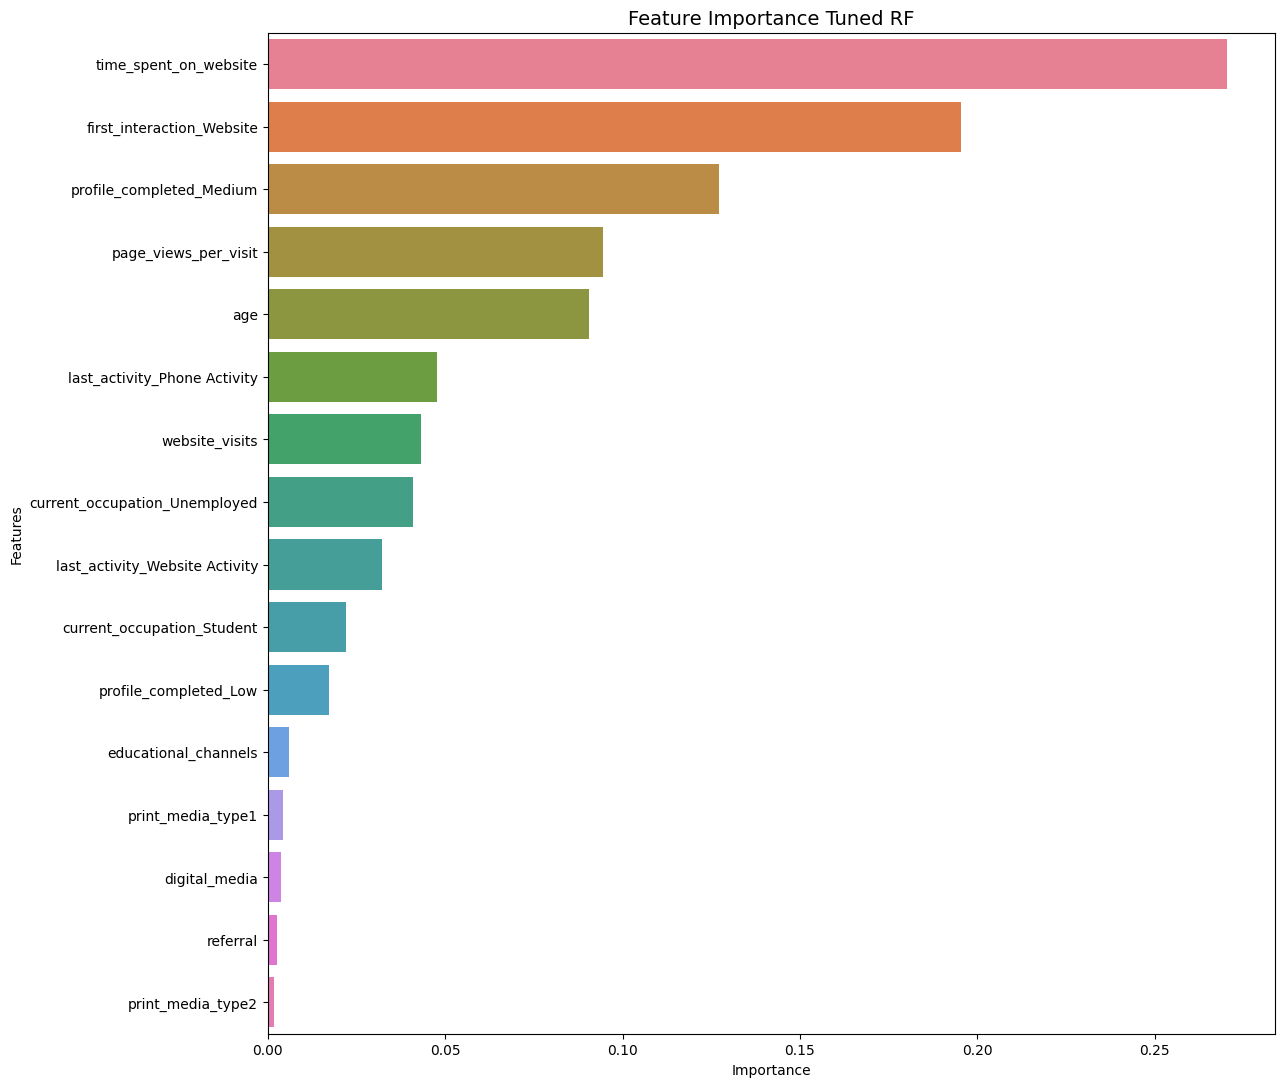

In [ ]:
# Plotting feature importance
importances = rf_estimator_tuned.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index, hue=importance_df.index)
plt.title('Feature Importance Tuned RF', fontsize = 14)
plt.ylabel('Features')


**Observations:**

Results from Tuned Random Forest is very similar as the Random Forest model
Time spent on website as the most important feature followed by first interation being website, profile completion , pages viewed per visit and age.

The order of the last 3 features is differet compared to the random forest model since this tuned random forest model has less overfitting it is more accurate.




## Do we need to prune the tree?

The ensemble nature of random forests helps reduce overfitting, making explicit pruning less necessary

## Actionable Insights and Recommendations

**Models Explored:**
We explored the Decision Tree model, Tuned decision tree model using GridSearchCV, Random forest and Tuned random forest using GridSearchCV. <br>

**Metrics Measurements:**
*    High Precision: The model is very good at avoiding false positives (incorrectly predicting a positive outcome).
*    High Recall: The model is very good at finding all the positive cases, even if it means some false positives.

**Trade-off:** In many cases, there's a trade-off between precision and recall. Increasing one often decreases the other.

**In the context of lead conversion, precision is generally more important than recall.**<br>
*    In lead conversion, false positives (leads that aren't actually interested) are costly because they consume resources and time that could be spent on actual prospects.
*    Each false positive represents a wasted opportunity to engage with a genuine prospect.
*    Of all models, the best performing model in terms of precision is the Tuned Random forest model <br>

**These are the Features in order of importance in playing a significant role in model accuracy** : <br>
1.   time_spent_on_website
2.   first_interaction_website
3.   profile_completed
4.   page_views_per_visit
5.   age

*not to be interpreted as "correlations" or "strength coefficients", as they do not represent a dependency with the target*

### **Actionable Insights and Recommendations**
Gathered insights from EDA and the plotted decision tree:

*    Target Audience based on data : Working professionals and unemployed aged 35-55 years old who prefer digital mediums.  
*    ExtraaLearn should focus on online-maketing and advertising as leads that first interacted with ExtraaLearn through website sees higher rate of conversion. This can be seen from EDA findings and this being the first feature of all models.
*    Improve usability of their website it is shown that there is a moderate positive correlation between Time Spent on Website and Status (as seen in the coorelation matrix ) which indiactes leads who spent more time on the website have higher conversion rates. This could also mean that people who have geniune interest may find it hard to navigate the website therefore spending alot of time to get the information needed.
*    Increase users profile completion by providing an incentive for users to complete their profile online. For exmaple offering time-limited free trail to certain lectures withint the course.
*   User profile completeion can also help telemarketers in ExtraaLearn to better profile their leads and understand their key interest and objectives when surfing ExtraaLearn sites. More information on user's agenda on why they surf Extraalearn sites has to be collected as their profile as this is lacking in current data.
*   As we see from decision tree that last_activity_phone may indicate that telemarketers has reached out to the user to increase lead conversion rate as there are more class = y[1] after this node


